In [20]:
import tensorflow as tf

from tensorflow.keras.applications import inception_v3

pre_trained_model = tf.keras.applications.InceptionV3(
                                include_top = False, 
                                weights = 'imagenet',
                                input_shape=(150,150,3))

for layer in pre_trained_model.layers:
  layer.trainable = False


pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [29]:
modelFE = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [30]:
modelFE.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_6 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 9)                 1161      
Total params: 24,163,369
Trainable params: 2,360,585
Non-trainable params: 21,802,784
_________________________________________________________________


In [31]:
import os

base_dir = "C:/Users/ferga/Documents/Python/hojas"

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.
)
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 5623 images belonging to 9 classes.
Found 1872 images belonging to 9 classes.
Found 1877 images belonging to 9 classes.


In [33]:
modelFE.compile(loss='categorical_crossentropy',
              optimizer= 'SGD',
              metrics=['accuracy'])

In [34]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

281
93


In [35]:
history = modelFE.fit(
    train_generator, 
    steps_per_epoch= steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps= validation_steps,
    verbose=1)

Epoch 1/10
281/281 [==============================] - 27s 87ms/step - loss: 1.5935 - accuracy: 0.4505 - val_loss: 1.3233 - val_accuracy: 0.5177
Epoch 2/10
281/281 [==============================] - 28s 99ms/step - loss: 1.2915 - accuracy: 0.5352 - val_loss: 1.2357 - val_accuracy: 0.5629
Epoch 3/10
281/281 [==============================] - 36s 127ms/step - loss: 1.1951 - accuracy: 0.5663 - val_loss: 1.2204 - val_accuracy: 0.5672
Epoch 4/10
281/281 [==============================] - 36s 128ms/step - loss: 1.1118 - accuracy: 0.5956 - val_loss: 1.1915 - val_accuracy: 0.5613
Epoch 5/10
281/281 [==============================] - 38s 135ms/step - loss: 1.0320 - accuracy: 0.6182 - val_loss: 1.1713 - val_accuracy: 0.5742
Epoch 6/10
281/281 [==============================] - 38s 135ms/step - loss: 0.9613 - accuracy: 0.6434 - val_loss: 1.1953 - val_accuracy: 0.5651
Epoch 7/10
281/281 [==============================] - 37s 132ms/step - loss: 0.9103 - accuracy: 0.6561 - val_loss: 1.2139 - val_accu

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

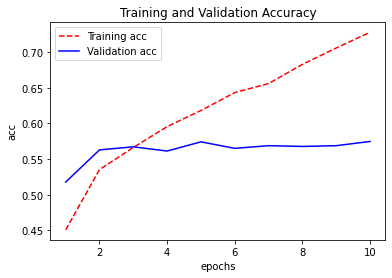

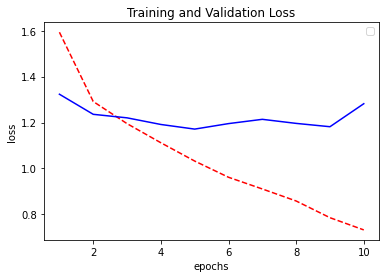

<Figure size 432x288 with 0 Axes>

In [36]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()